# Competition 1

## the purpose of this notebook is yada yada yada

backround info on the topic

directions as to what we did (to be filled out later)

here are our steps

In [1]:
# importing proper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn


Here is the data dictionary in used as a reference of column names.
![Variable Dictionary](data_dictionary.PNG)

In [2]:
# create an initial data frame from data supplied to us
df  = pd.read_excel('Competition1_raw_data.xlsx', header=0,)
df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.6,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167


# It is proper that we follow steps outlined in the CRISP-DM Model. 

### General process for data preprocessing: 
- Data collection
- Data understanding
- Data cleaning
- Data transormation

### Since we have already put our data into a pandas dataframe, we will proceed with data understanding.

### Let's do some prelimanry EDA to get a sense of what we are dealing with.

### First, let's look at some characteristics including data types, count, and simple distributions.

In [3]:
# let's look at column values and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null object
P(H)       682 non-null object
P(L)       682 non-null object
P(1Day)    682 non-null object
C1         682 non-null object
C2         682 non-null object
C3         682 non-null object
C4         682 non-null object
C5         682 non-null object
C6         682 non-null object
C7         682 non-null object
T1         682 non-null object
T2         682 non-null object
T3         682 non-null object
T4         682 non-null object
T5         682 non-null object
S1         682 non-null object
S2         682 non-null object
S3         682 non-null object
dtypes: object(22)
memory usage: 117.3+ KB


Hmm, every column is classified as an object. We know that some columns, like C1 should be at least an integer. Let's look at a couple of columns to see if they all share a common source error.

In [4]:
df['C1'].value_counts()

-      22
93     15
84     14
77     13
92     13
112    12
91     12
119    12
85     11
78     10
100    10
76     10
104    10
111    10
94     10
98      9
105     9
79      8
147     7
140     7
89      7
124     7
83      7
70      7
72      7
106     7
107     7
90      7
118     6
133     6
       ..
161     1
506     1
153     1
658     1
131     1
203     1
206     1
257     1
25      1
251     1
243     1
307     1
241     1
240     1
237     1
234     1
233     1
230     1
227     1
207     1
226     1
225     1
736     1
223     1
222     1
218     1
217     1
215     1
213     1
520     1
Name: C1, Length: 245, dtype: int64

There are 22 instances of "-", which, as described by the data dictionary, is a missing value. There may be more of these, but format is not very useful, so we will convert all '-' to NaN values.  

In [6]:
df_missing = df[df.C1 == '-']
df_missing.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,-,-,-,-,-,-,-,...,-,-,332,7534,6747,169,263,51,65,74
86,BLT,BLOUNT INTERNATIONAL INC,-,-,-,-,-,-,-,-,...,-,-,538,12732,11126,301,631,94,172,116
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621,4.5,6.5,5.5,-,-,-,-,...,5000000,-,351,10352,9296,235,482,52,124,120
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640,3,5,4,-,-,-,59.261,...,3350000,59.261,406,12065,11056,282,667,72,169,182
203,ELMD,"Electromed, Inc.",3845,4,6,4,-,-,-,12.999,...,1700000,12.999,224,6146,5551,154,386,29,52,140
215,ESEA,EUROSEAS LTD.,4412,7,-,-,-,-,-,-,...,9602340,-,521,12812,11190,285,545,72,60,121
217,EURX,EURAND N.V.,2834,16,19,17,-,-,-,109.336,...,7000000,109.336,-,-,-,-,-,-,-,-
268,GSL,GLOBAL SIGNAL INC,-,18,-,-,-,-,-,-,...,7000000,-,631,19479,17409,451,976,71,252,155
286,HPJ,"Highpower International, Inc.",3690,3.25,4,3,-,-,-,73.262,...,525000,73.262,377,10731,9703,240,486,45,104,96
330,KFI,KKR Financial Holdings LLC,-,-,-,-,-,-,-,-,...,-,-,246,527,9046,355,10277,64,48,123


Indeed, missing values in columns are all denoted by '-'; replace them with 'NaN' for better handling. 

In [7]:
df = df.replace('-', np.NaN)

In [24]:
df[df.C1.isnull()].head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0
86,BLT,BLOUNT INTERNATIONAL INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621,4.5,6.5,5.5,NaN,NaN,NaN,NaN,...,5000000.0,NaN,351.0,10352.0,9296.0,235.0,482.0,52.0,124.0,120.0
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640,3.0,5.0,4.0,NaN,NaN,NaN,59.261,...,3350000.0,59.261,406.0,12065.0,11056.0,282.0,667.0,72.0,169.0,182.0
203,ELMD,"Electromed, Inc.",3845,4.0,6.0,4.0,NaN,NaN,NaN,12.999,...,1700000.0,12.999,224.0,6146.0,5551.0,154.0,386.0,29.0,52.0,140.0


checkpoint 1

In [8]:
#Check to see if probem above is fixed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


Columns I1, I2, I3, are now correcly labeled as strings, while the rest are catogorized as floats, which be looking at the data dictionary, is the right direction.

In [10]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1],"""     """, "Percentage of missing values:", names[-1], round((value[-1]/682)*100))
    
    

number of missing values:  I1 0       Percentage of missing values: I1 0.0
number of missing values:  I2 0       Percentage of missing values: I2 0.0
number of missing values:  I3 8       Percentage of missing values: I3 1.0
number of missing values:  P(IPO) 5       Percentage of missing values: P(IPO) 1.0
number of missing values:  P(H) 10       Percentage of missing values: P(H) 1.0
number of missing values:  P(L) 10       Percentage of missing values: P(L) 1.0
number of missing values:  P(1Day) 22       Percentage of missing values: P(1Day) 3.0
number of missing values:  C1 22       Percentage of missing values: C1 3.0
number of missing values:  C2 22       Percentage of missing values: C2 3.0
number of missing values:  C3 36       Percentage of missing values: C3 5.0
number of missing values:  C4 22       Percentage of missing values: C4 3.0
number of missing values:  C5 6       Percentage of missing values: C5 1.0
number of missing values:  C6 6       Percentage of missing values:

Now that we have a working missing value placeholder, let's get a better understanding of our data before computing on it. 

In [11]:
#split dataframe into two parts: categorical variables, and numberic variables, and perform df.describe on each

categorical_features = ['I1', 'I2', 'I3']
categorical_df = df[categorical_features]
numeric_df = df.drop(categorical_features, axis=1)

In [12]:
# df.describe to show basic stats
categorical_df.describe()

,I1,I2,I3
count,682,682,674
unique,682,682,201
top,HCA,MERRIMACK PHARMACEUTICALS INC,2834
freq,1,1,76


In [13]:
numeric_df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


For each column with missing values, we will decide an approprate imputation method. First, we will look at the columns with minimal missing values, like 1 missing value.

In [14]:
#trying out pandas profiling
#import pandas_profiling as pp
#pfr = pp.ProfileReport(df)

In [15]:
#pfr.to_file('df_profile_report')

Going through the variables individually from the report, here are some notes about missing values, extreme values, and strategies to keep in mind moving forward.

Starting with the IPO characteristics:
- C1: 22 missing values, skewed right. Have to determine appropriate imputation method (ffill, bfill, interpolation?)
- C2: 22 missing values, but a dummy/binary variable. can use possible ml (logistic regression) method to impute missing values.
- C3: 36 missing values, strong skewness, strong outliers. Will have to smooth this variable's noise. 
- C4: 22 missing values, fairly normal distribution. Dealing with ratio/returns here, so shouldn't be much noise. Mean/median imputation might be useable
- C5: 6 missing values, # shares outstanding, so range is very large; might look like outliers, but can't treat as so since it actually is true. Missing values might actually be able to look up.
- C6: 6 mising values, # ofering shares, so similar story to C5
- C7: __72__ missing values, might be outliers at end range of values, but "not really" outliers. Imputing challenge.

Looking at the Textual characteristics:
- T1: 1 missing value, slightly skewed with some high outliers. Since only 1 missing value, might be appropriate to simply impute with median.
- T2: Has minimum value of 0, which is puzzling. Highly correlated with T1 (.93). Would be appropriate to dismiss this variable.
- T3: Has minimum value of 0, which is puzzling. Highly correlated with T2 (.95). Also would be appropriate to dismiss thi variable.
- T4: Has minimum value of 0, which is puzzling. Highly correlated with T3 (.96). Appropriate to dismiss this variable
- T5: 1 missing value, with one very large outlier. Will have to handle this outlier. Has a nonsensical value of -1, need to clean this. 

Looking at sentiment characterisitics:
- S1: 1 missing value, slightly skewed right. Also minimum value of -1, which is nonsensical. Must handle such exceptions
- S2: 1 missing value, poisson distribution. Some high outliers. 
- S3: 1 missing value, skewed right. Fairly "stable" variable; not much quirkiness.

Looking at IPO Pricing:
- P(IPO): 5 missing values, slightly skewed right. This is final IPO offering price, which may be researchable.
- P(H): 10 missing values, but contains a value of 0, which wouldn't make sense. Also large outlier needs to be handled.
- P(L): Almost perfectly correlating with P(H) (.99). Can be dropped AFTER making target variable calculations. 
- P(1Day): 22 missing values, also has value of 0. Need to research if values like this and in P(H) make sense. Also two large outliers. 

Lastly,
- I3: 8 missing values, imputing will be need to be done manually by researching the corresponding company.


## Some variables have nonsensical values, like a value of -1 in T5. Thus, here is a quick summary of any nonsensical values that may arise in our dataset. 

* Missing values
* Value of -1 in T5 and S1; can't have a negative number in these columns.
* Value of 0 in P(1Day); wouldn't make sense for a stock to cost 0$ at end of trading day.
* Values of 0 in T2, T3, and T4, which may or may not be a error (could be there was no MD%A). 
 

Looking at the last bullet, if there are no words and/or sentences in a MD&A, then there should also be a consistent value in the other text variabeas as well. Therefore, we need to make sure that everything is actually consistent. Check if there are any instances of:
- more sentences than words (T1 > T2), 
- number of real words greater than number of words (T3 > T2),
- number of long sentences greater than number of sentences (T4 >T1)
- number of long words greater than number of words (T5 > T2)

In [28]:
# Return a dataframe index for each instance, starting with T1 > T2
T1_T2 = df[df.T1 > df.T2]
T1_T2.index

Int64Index([125, 199], dtype='int64')

In [31]:
#Return dataframe of T3 > T2
#All other bulleted instances are captured in this dataframe as well,
#So this output will be shown (check indexes of each bullet)
T3_T2 = df[df.T3 > df.T2]
T3_T2

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.84,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.50,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0
330,KFI,KKR Financial Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0


In [29]:
#Return dataframe index of T4 > T1
T4_T1 = df[df.T4 > df.T1]
T4_T1.index

Int64Index([330], dtype='int64')

In [30]:
#Return dataframe index of T5 > T2
T5_T2 = df[df.T5 > df.T2]
T5_T2.index

Int64Index([125, 199, 330], dtype='int64')

Only the rows of index 125, 199, and 330 have these errors. Since many text columns have high intercorrelations, it is feasable to only use some of these variables. T1 may be most appropriate, as suggested by pandas profiling report. Also, using just T1 and T5 (number of sentences and number of long words) may be the most logical combination to capture all of the textual characterisitcs (T1,T2,T3,T4,T5), as well as avoiding any logical contradictions. 

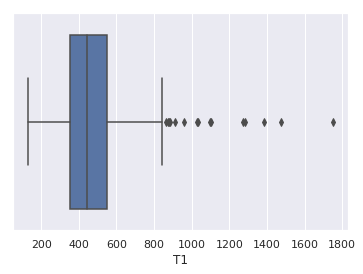

In [24]:
#T1 distributions
sns.boxplot(df['T1'])



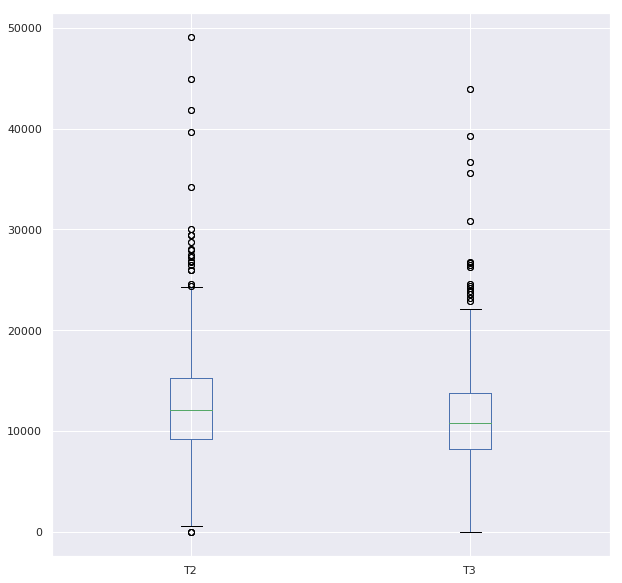

In [15]:
# repeat process for rest of text variables
words = ['T2', 'T3']
long_sentence_and_word = ['T4', 'T5']
for index in df[words]:
    df.boxplot(column = words, figsize=(10,10))

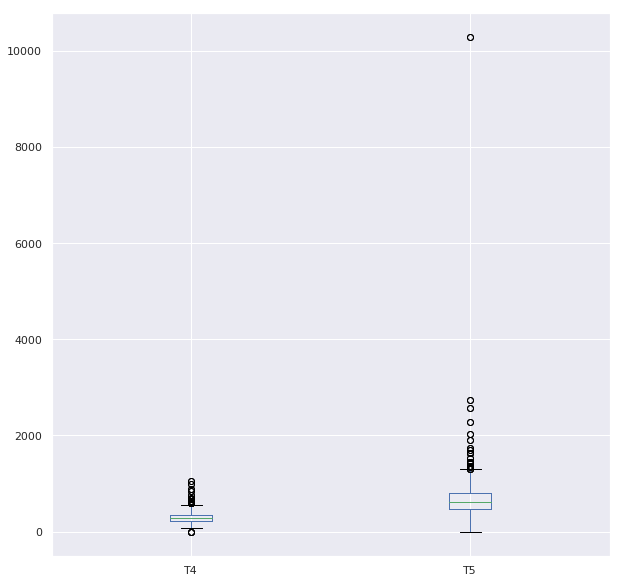

In [16]:
for index in df[long_sentence_and_word]:
    df.boxplot(column = long_sentence_and_word, figsize=(10,10))

In [17]:
# fill in missing values for all 5 columns with median

for col in df.columns[14:19]:
    df[col] = df[col].fillna(df[col].median())
    print(df[col].isnull().sum())

0
0
0
0
0


__Note the extreme outlier in 'T5'; there is more than 10000 long words. Let's investigate further__

In [18]:
# return a dataframe where # of long words exceeds total number of words
count = df['T5'] - df['T2']

df.loc[count > 0]


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.84,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.50,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0
330,KFI,KKR Financial Holdings LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0


Checkpoint 2. 

There can't be more long words (T5) than number the of total words (T2), so there is a problem with these three examples. Need to correct from here. Code below is maybe for later use. not useful now, can ignore for now. 

## LETS have a look at the missing data in the Sentiment section 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


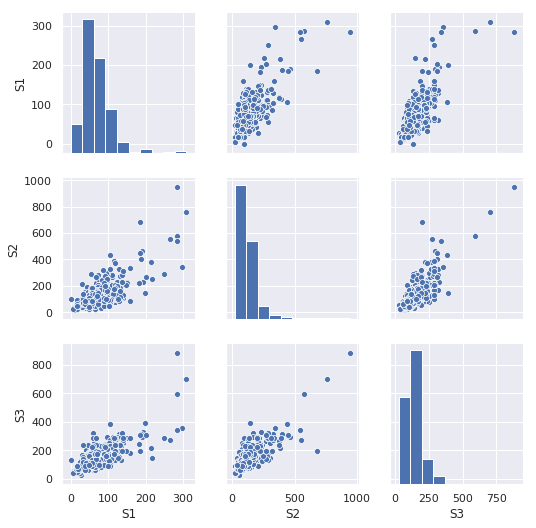

In [21]:
# create a pair pot
Sentiment = ["S1", "S2", "S3"]

Sentiment = df[Sentiment]

sns.pairplot(Sentiment)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dcb846f60>,
      dtype=object)

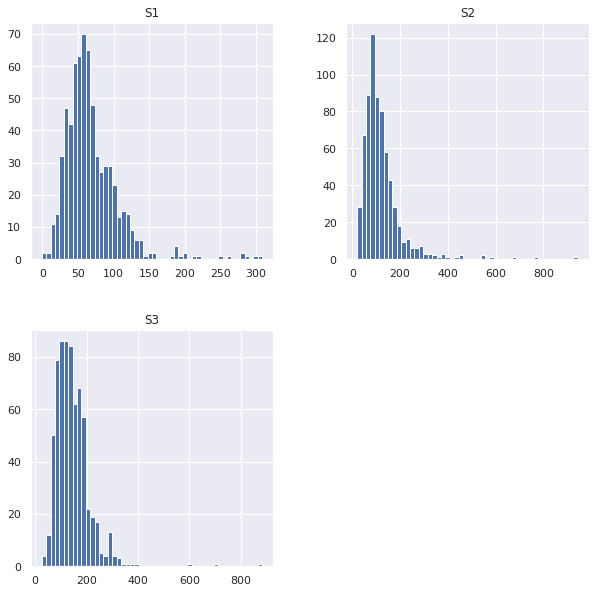

In [33]:
Sentiment = df[Sentiment]
Sentiment.hist(figsize = (10, 10), bins=50)

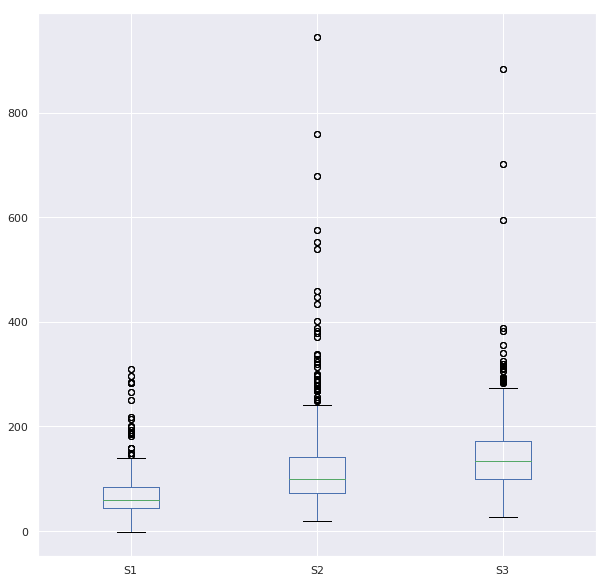

In [26]:
Sentiment = ["S1", "S2", "S3"]

for index in df[Sentiment]:
    df.boxplot(column = Sentiment, figsize=(10,10))

In [29]:
# fill in missing values for all 3 Sentiment columns with median

for col in df.columns[19:]:
    df[col] = df[col].fillna(df[col].median())
    print(df[col].isnull().sum())

0
0
0


## LETS have a look at the missing data in the IPO pricing section 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


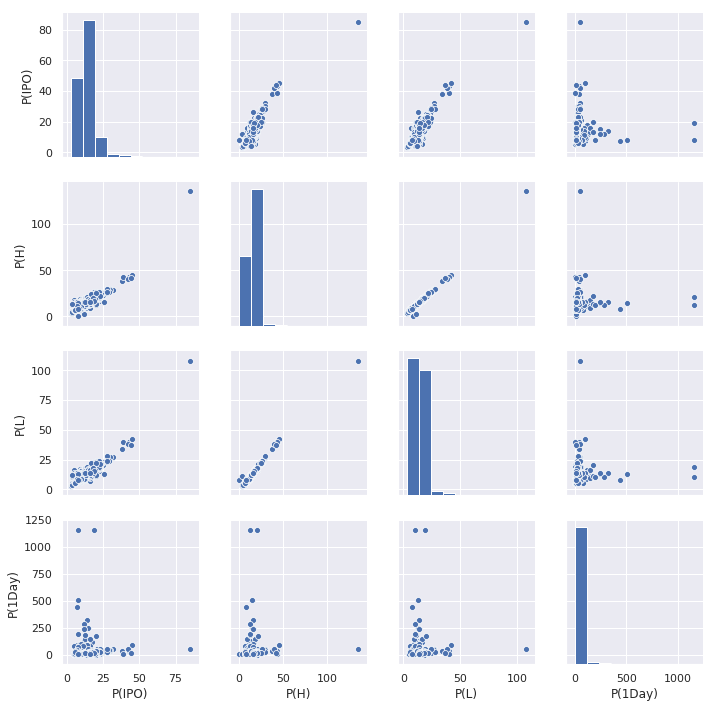

In [35]:
# create a pair pot
IPO_pricing = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)']

IPO_pricing = df[IPO_pricing]

sns.pairplot(IPO_pricing)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dcc2af1d0>,
      dtype=object)

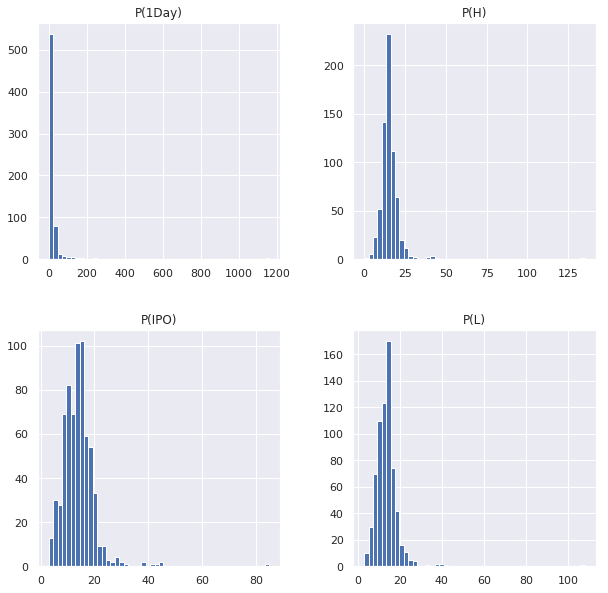

In [20]:
IPO_pricing.hist(figsize = (10, 10), bins=50)

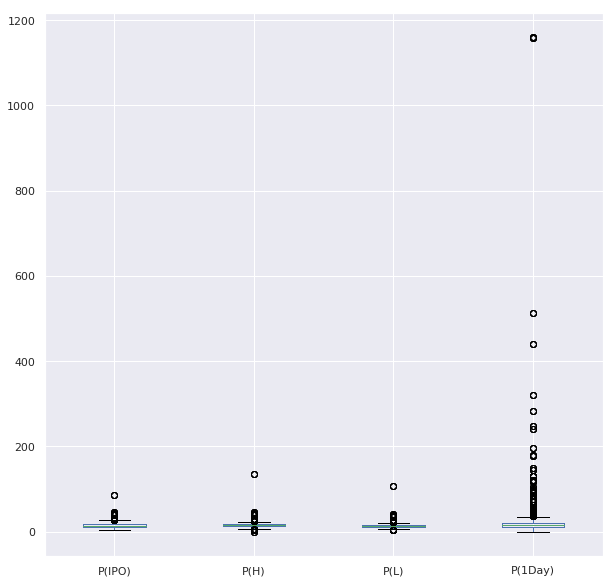

In [37]:
IPO_pricing = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)']

for index in df[IPO_pricing]:
    df.boxplot(column = IPO_pricing, figsize=(10,10))

In [38]:
# fill in missing values for all 4 IPO pricing columns with median

for col in df.columns[3:7]:
    df[col] = df[col].fillna(df[col].median())
    print(df[col].isnull().sum())

0
0
0
0


##### lets check that we filled the ipo_pricing column with the median. we know row id 330 is NAN from above

In [47]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1])
    
    

number of missing values:  I1 0
number of missing values:  I2 0
number of missing values:  I3 8
number of missing values:  P(IPO) 0
number of missing values:  P(H) 0
number of missing values:  P(L) 0
number of missing values:  P(1Day) 0
number of missing values:  C1 22
number of missing values:  C2 22
number of missing values:  C3 36
number of missing values:  C4 22
number of missing values:  C5 6
number of missing values:  C6 6
number of missing values:  C7 72
number of missing values:  T1 0
number of missing values:  T2 0
number of missing values:  T3 0
number of missing values:  T4 0
number of missing values:  T5 0
number of missing values:  S1 0
number of missing values:  S2 0
number of missing values:  S3 0


In [48]:
df["P(IPO)"].median()

13.5

In [49]:
df.loc[count > 0]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
125,CLD,CLOUD PEAK ENERGY INC.,1221,15.0,18.0,16.0,14.840,100.0,1.0,2.00,...,30600000.0,1239.711,656.0,0.0,18173.0,486.0,1135.0,77.0,229.0,219.0
199,EDG,Edgen Group Inc.,5150,11.0,16.0,14.0,9.500,120.0,1.0,-0.59,...,15000000.0,911.612,619.0,0.0,19153.0,474.0,1108.0,104.0,224.0,253.0
330,KFI,KKR Financial Holdings LLC,NaN,13.5,15.0,13.0,14.845,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0
